# Second model - Polish Dataset

## Libraries

In [77]:
!pip install transformers
!pip install -q pyyaml h5py
import pandas as pd
from transformers import *
import numpy as np
from sklearn.model_selection import train_test_split


## Data Preprocessing

*   Reading data
*   Change columns names
*   Drop NaN rows
*   Fill others NaN values by special sign

In [95]:
df = pd.read_excel('polishOriginalDataset.xlsx')
df.reset_index()
df = df.iloc[:,[6,8,9,10,15,16,19,21,5]]
df.columns = [
              "type_of_sentence",
              "verb_main_semantic_class",
              "verb_second_semantic_class",
              "verb_third_semantic_class",
              "verb_veridical_positive",
              "verb_veridical_negative",
              "verb_tense",
              "t_negation",
              "semantic_relation"
              ]
df.dropna(inplace=True, axis = 0, how = 'all')
df.fillna(axis = 0, inplace =True, value="none")
df.head()

,type_of_sentence,verb_main_semantic_class,verb_second_semantic_class,verb_third_semantic_class,verb_veridical_positive,verb_veridical_negative,verb_tense,t_negation,semantic_relation
0,eliptyczne,mówienia,none,none,o?,?,brak,0,N
1,eliptyczne,epistemiczny,none,none,?,?,past,0,?
2,eliptyczne,mówienia,none,none,?,?,past,0,N
3,1,epistemiczny,percepcyjny,none,"""+""","""+""",past,0,N
4,1,epistemiczny,percepcyjny,none,o,o,present,0,N


### Cleaning data by deleting uncertainty - simplification 

In [96]:
# df.type_of_sentence.unique() cleaning not needed 

# df.verb_main_semantic_class - only (epistemiczny, mówienia, ?)
main_semantic_class_unique = df.verb_main_semantic_class.unique()
main_semantic_class_unique = main_semantic_class_unique[main_semantic_class_unique != "epistemiczny"]
main_semantic_class_unique = main_semantic_class_unique[main_semantic_class_unique != "mówienia"]
df.verb_main_semantic_class = df.verb_main_semantic_class.apply(lambda x: '?' if x in main_semantic_class_unique else x )

# df.verb_second_semantic_class.unique() cleaning not needed 
# df.verb_third_semantic_class.unique() cleaning not needed

# verb veridical positive cleaning
df.verb_veridical_positive = df.verb_veridical_positive.apply(lambda x: '+' if '+' in x else x)
df.verb_veridical_positive = df.verb_veridical_positive.apply(lambda x: '-' if '-' in x else x)
df.verb_veridical_positive = df.verb_veridical_positive.apply(lambda x: 'o' if 'o' in x else x)
df.verb_veridical_positive = df.verb_veridical_positive.apply(lambda x: '?' if '?' in x else x)

# verb veridical negative cleaning
df.verb_veridical_negative = df.verb_veridical_negative.apply(lambda x: '+' if '+' in x else x)
df.verb_veridical_negative = df.verb_veridical_negative.apply(lambda x: 'o' if 'o' in x else x)
df.verb_veridical_negative = df.verb_veridical_negative.apply(lambda x: '-' if '-' in x else x)
df.verb_veridical_negative = df.verb_veridical_negative.apply(lambda x: '?' if '?' in x else x)

# df.verb_tense.unique() cleaning not needed
# df.t_negation.unique() cleaning not needed
# df.semantic_relation.unique() cleaning not needed 

df.head()

,type_of_sentence,verb_main_semantic_class,verb_second_semantic_class,verb_third_semantic_class,verb_veridical_positive,verb_veridical_negative,verb_tense,t_negation,semantic_relation
0,eliptyczne,mówienia,none,none,o,?,brak,0,N
1,eliptyczne,epistemiczny,none,none,?,?,past,0,?
2,eliptyczne,mówienia,none,none,?,?,past,0,N
3,1,epistemiczny,percepcyjny,none,+,+,past,0,N
4,1,epistemiczny,percepcyjny,none,o,o,present,0,N


### Possible feature values

In [97]:
print(df.type_of_sentence.unique())
print(df.verb_main_semantic_class.unique())
print(df.verb_second_semantic_class.unique())
print(df.verb_third_semantic_class.unique())
print(df.verb_veridical_positive.unique())
print(df.verb_veridical_negative.unique())
print(df.verb_tense.unique())
print(df.t_negation.unique())


['eliptyczne' 1 'generalne' 'pytajne' 'modalne'
 'powtarzające się zdarzenie' 'warunkowe' 'powinnościowe'
 'imperatyw; warunkowe' 'none' '?' 'imperatyw ' 'modal'
 'warunkowe; pytajne' 'wolitywne' 'performatyw' 'kontrfaktyczne'
 'imperatyw' 'prostujące' 'korygujące' 'performatyw; warunkowe'
 'warunkowe; modalne' 'przypuszczające' 'wolitywne; performatyw'
 'modalne; pytajne' 'imperatyw; generalne' 'sprostowanie' 'dyspozycyjne'
 'modalne; warunkowe' 'pytajne; modalne' 'modalne; alternatywa'
 'alternatywa' 'warunkowe; generalne']
['mówienia' 'epistemiczny' '?']
['none' 'percepcyjny' 'epistemiczny' 'emotywny' 'wolicjonalny' 'mówienia'
 'wnioskowania' 'nie-wiedzowy' 'performatyw' 'pamięciowy' 'zdarzeniowy'
 'przyczynowy' 'wolitywny' 'czynnościowy']
['none' 'mówienia' 'wolicjonalny' 'epistemiczny' 'percepcyjny']
['o' '?' '+' '-']
['?' '+' 'o' '-']
['brak' 'past' 'present' 'future']
[0 1]


In [81]:
df.verb_main_semantic_class.value_counts()

epistemiczny    1079
mówienia         973
?                544
Name: verb_main_semantic_class, dtype: int64

In [0]:
# choose columns 
df = df[[
  "verb_main_semantic_class",
  "verb_veridical_positive",
  "verb_veridical_negative",
  "verb_tense",
  "semantic_relation"      
]]
df.to_csv("plData.csv", index=False)

### Vactorize data and split to features and target

#### Vectorize (one =hot encoding)

In [0]:
df = pd.get_dummies(df)

#### Split to features and target

In [0]:
X = df.iloc[:,0:-4]
y = df.iloc[:,-4:]

#### Features columns

In [85]:
X.columns

Index(['verb_main_semantic_class_?', 'verb_main_semantic_class_epistemiczny',
       'verb_main_semantic_class_mówienia', 'verb_veridical_positive_+',
       'verb_veridical_positive_-', 'verb_veridical_positive_?',
       'verb_veridical_positive_o', 'verb_veridical_negative_+',
       'verb_veridical_negative_-', 'verb_veridical_negative_?',
       'verb_veridical_negative_o', 'verb_tense_brak', 'verb_tense_future',
       'verb_tense_past', 'verb_tense_present'],
      dtype='object')

#### Target columns

In [86]:
y.columns

Index(['semantic_relation_?', 'semantic_relation_C', 'semantic_relation_E',
       'semantic_relation_N'],
      dtype='object')

### k-fold crossvalidation preparing

In [0]:
k=7
from sklearn.model_selection import KFold
kfold = KFold(n_splits = k, shuffle=True)

acc_per_fold = []
loss_per_fold = [] 

***
# Keras model building

### Model training

In [0]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

It takes only 1-2 minutes to train this model with 7-crossvalidation.

In [89]:
fold_no = 1 

#get number of columns in training data
n_cols = X.shape[1]
print(n_cols)

for train, test in kfold.split(X,y):
  # FOLD PRINTOUT
  print(100*'_')
  print (f"FOLD NO {fold_no} START")  

  # model architecture  
  model = tf.keras.Sequential()
  model.add(Dense(16, activation='relu', input_shape=(n_cols,)))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(4, activation='softmax'))

  # model compile 
  model.compile(optimizer = 'adam', loss="categorical_crossentropy", metrics = ['accuracy'])
  
  # training
  history = model.fit(X.iloc[train], y.iloc[train], validation_split=0.2, epochs=70)

  # scores 
  scores = model.evaluate(X.iloc[test], y.iloc[test], verbose=0)
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # iterator up
  fold_no = fold_no + 1

15
____________________________________________________________________________________________________
FOLD NO 1 START
Epoch 1/70
56/56 [==============================] - 0s 4ms/step - loss: 1.2040 - accuracy: 0.6011 - val_loss: 0.9537 - val_accuracy: 0.8539
Epoch 2/70
56/56 [==============================] - 0s 2ms/step - loss: 0.6816 - accuracy: 0.8646 - val_loss: 0.5506 - val_accuracy: 0.8629
Epoch 3/70
56/56 [==============================] - 0s 2ms/step - loss: 0.5217 - accuracy: 0.8691 - val_loss: 0.4938 - val_accuracy: 0.8629
Epoch 4/70
56/56 [==============================] - 0s 2ms/step - loss: 0.4882 - accuracy: 0.8691 - val_loss: 0.4805 - val_accuracy: 0.8629
Epoch 5/70
56/56 [==============================] - 0s 2ms/step - loss: 0.4665 - accuracy: 0.8713 - val_loss: 0.4716 - val_accuracy: 0.8629
Epoch 6/70
56/56 [==============================] - 0s 2ms/step - loss: 0.4532 - accuracy: 0.8736 - val_loss: 0.4647 - val_accuracy: 0.8607
Epoch 7/70
56/56 [======================

### Scores

In [90]:
# == Provide average scores ==
print('Score per fold:')
for i in range(0, len(acc_per_fold)):
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

Score per fold:
> Fold 1 - Loss: 0.3937833309173584 - Accuracy: 89.75741267204285%
> Fold 2 - Loss: 0.4209561049938202 - Accuracy: 88.94878625869751%
> Fold 3 - Loss: 0.4010755717754364 - Accuracy: 88.94878625869751%
> Fold 4 - Loss: 0.4849584102630615 - Accuracy: 85.17520427703857%
> Fold 5 - Loss: 0.46992728114128113 - Accuracy: 86.79245114326477%
> Fold 6 - Loss: 0.4490264356136322 - Accuracy: 87.87062168121338%
> Fold 7 - Loss: 0.44478389620780945 - Accuracy: 88.3783757686615%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 87.98166257994515 (+- 1.438455932686618)
> Loss: 0.43778729013034273
------------------------------------------------------------------------


## Plot with train and test accuracy

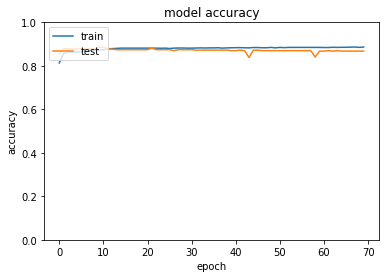

In [91]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0,1)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

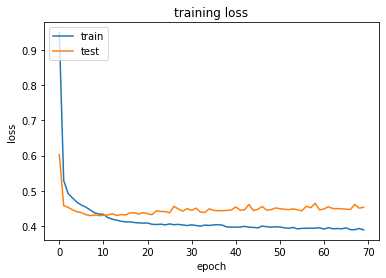

In [92]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('training loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Save model 


In [0]:
model.save('featureModelPl.h5')